<a href="https://colab.research.google.com/github/Karlosicolombia/Synthethic-Training-Data-for-Sponswatch-AB/blob/main/Kopia_av_masking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

directory ='/content/drive/MyDrive/adidas'

Mounted at /content/drive


In [26]:
from google.colab.patches import cv2_imshow

img = cv2.imread(r'/content/drive/MyDrive/Examensarbete/adidaslogo2vit.png',cv2.IMREAD_UNCHANGED)
#cv2_imshow(img)
a = img.shape
print(a)

(863, 1280, 4)


In [4]:
kernel = np.ones((5, 5), np.uint8)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [5]:
Lower_hsv = np.array([51, 120, 0])
Upper_hsv = np.array([255, 255, 255])

In [6]:
# creating the mask by eroding,morphing,
# dilating process
Mask = cv2.inRange(hsv, Lower_hsv, Upper_hsv)
Mask = cv2.erode(Mask, kernel, iterations=1)
Mask = cv2.morphologyEx(Mask, cv2.MORPH_OPEN, kernel)
Mask = cv2.dilate(Mask, kernel, iterations=1)

In [7]:
Mask = cv2.bitwise_not(Mask)

In [19]:
# Displaying the image
#cv2_imshow(Mask)

In [9]:
# waits for user to press any key
# (this is necessary to avoid Python 
# kernel form crashing)
cv2.waitKey(0)

-1

In [10]:
# closing all open windows
cv2.destroyAllWindows()

In [11]:
def flip(img):
  rand = np.random.uniform(0,1)
  image = img
  if rand > 0.5:
    image = cv2.flip(img, 0)
    return image
  else:
    image = img
    return image

#Mask = augmentationflip(Mask, True)
#cv2_imshow(Mask)




In [12]:
import numpy as np
def rotation(img,rotation):
  rotation = int(np.random.uniform(-rotation,rotation))
  h,w = img.shape[:2]

  matrix = cv2.getRotationMatrix2D((int(w/2),int(h/2)),rotation,0.4 )
  image = cv2.warpAffine(img, matrix, (img.shape[1],img.shape[0]))
  return image

#rotated = rotation(Mask,180)
#cv2_imshow(rotated) 



In [13]:
def randomblur(img):
  Kx = (np.random.randint(0,15))
  Ky = Kx
  if Kx > 0:
    kernel = (Kx,Ky)
    image = cv2.blur(img,kernel)
    return image
  else: 
    image = img
    return image




In [14]:
def crop(img):
  scaleW = np.random.uniform(0.3,1.5)
  scaleH = np.random.uniform(0.3,1.5)
  
  image = cv2.resize(img, (int(img.shape[1]*scaleW),int(img.shape[0]*scaleH)), interpolation = cv2.INTER_AREA)
  return image







In [15]:
import numpy as np
def saturation_image(img):
    version = np.random.randint(0,4)
    saturation = int(np.random.uniform(0,130))
    
    print(version)
    print(saturation)
    version = 1

    if version == 0:
      image = img
      return image
    if version == 1:
      
      return image

    if version == 2:
      image = img[:,saturation,:]
      image = cv2.cvtColor(image,cv2.COLOR_BGR2BGRA)
      return image
    if version == 3:
      image = img[:,:,saturation]
      image = cv2.cvtColor(image,cv2.COLOR_BGR2BGRA)
      return image
    
#img = cv2.imread(r'/content/drive/MyDrive/Examensarbete/adidaslogo2vit.png',cv2.IMREAD_UNCHANGED)
#img = saturation_image(img)   
#cv2_imshow(img)
#cv2.waitKey(0)

In [43]:
def cutout(img):
  threshold = np.random.uniform(0,1)
  if threshold > 0.1:
    
    endpoint = np.random.uniform(-2,2)

    
    widthS = int(img.shape[1]/2)
    heightS = int(img.shape[0]/2)


    widthE = int(img.shape[1]*endpoint)
    heightE = int(img.shape[0]*endpoint)

    image = cv2.rectangle(img, (widthS, heightS), (widthE, heightE), (0, 0, 0), -1)
    return image
  else:
    return img

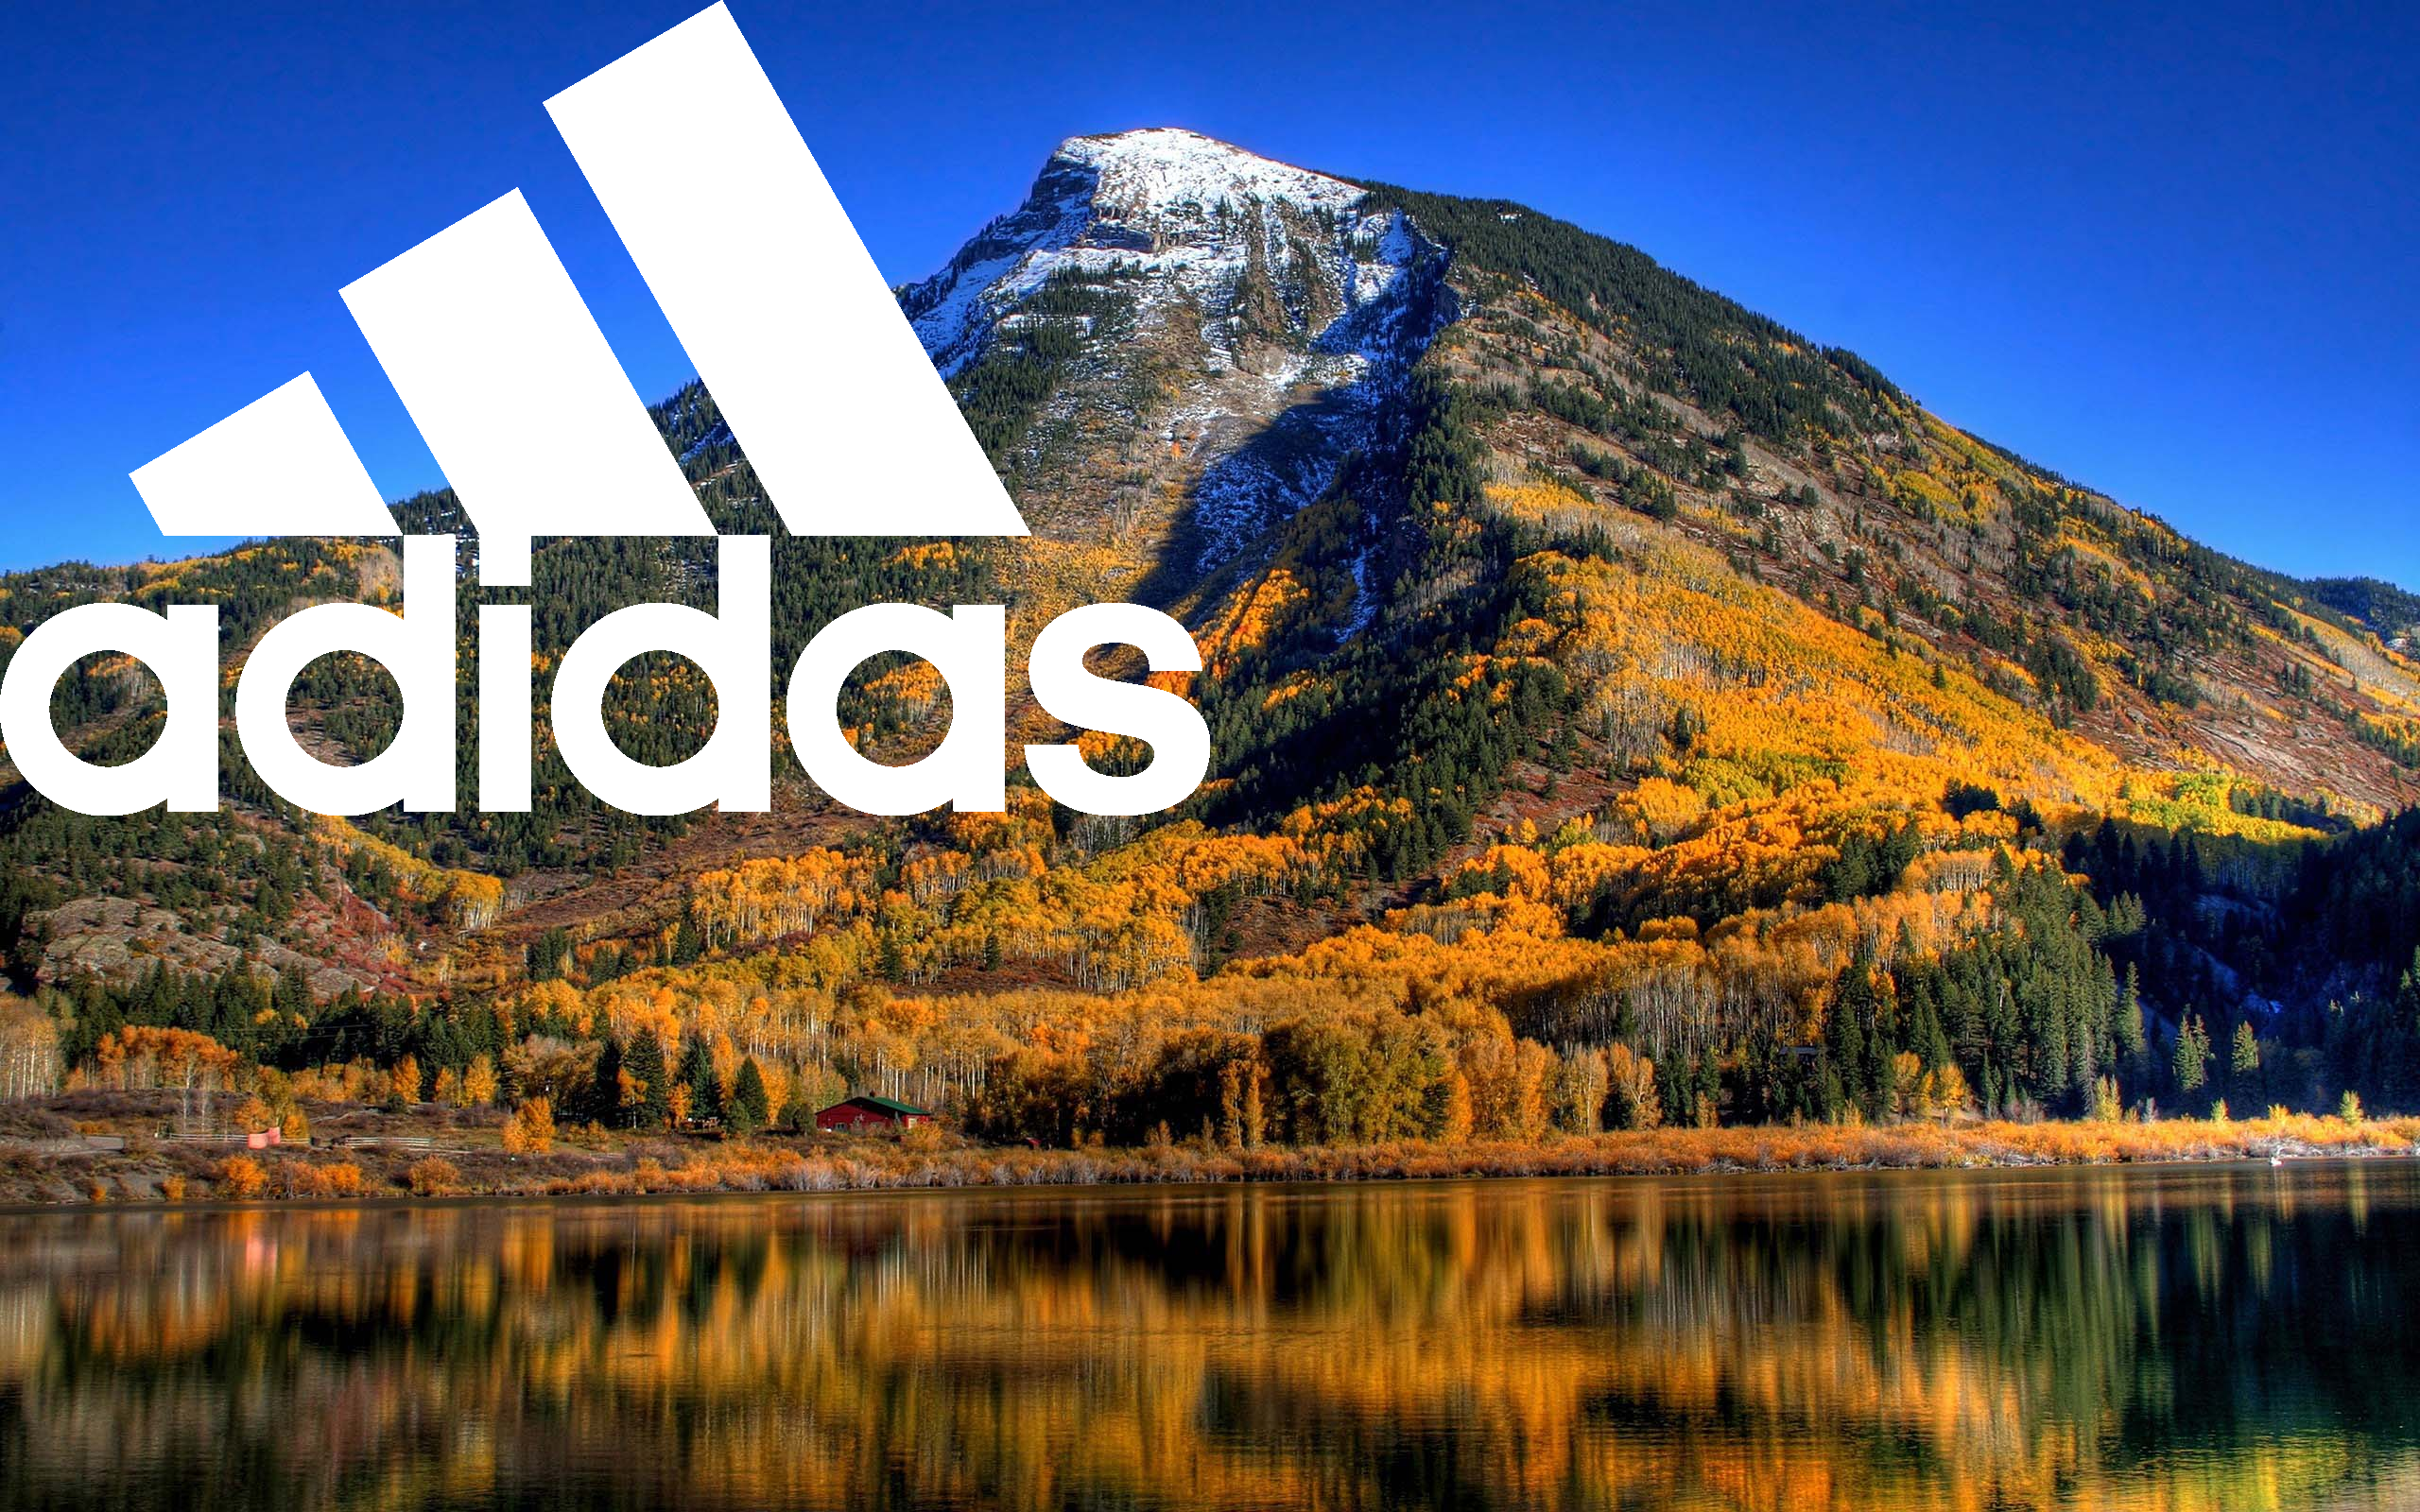

AttributeError: ignored

In [20]:
import cv2

background = cv2.imread(r'/content/drive/MyDrive/Examensarbete/mountain', cv2.IMREAD_UNCHANGED)
overlay = cv2.imread(r'/content/drive/MyDrive/Examensarbete/adidaslogo2vit.png',cv2.IMREAD_UNCHANGED)

import cv2



height, width = overlay.shape[:2]
for y in range(height):
    for x in range(width):
        overlay_color = overlay[y, x, :3]  # first three elements are color (RGB)
        overlay_alpha = overlay[y, x, 3] / 255  # 4th element is the alpha channel, convert from 0-255 to 0.0-1.0

        # get the color from the background image
        background_color = background[y, x]

        # combine the background color and the overlay color weighted by alpha
        composite_color = background_color * (1 - overlay_alpha) + overlay_color * overlay_alpha

        # update the background image in place
        background[y, x] = composite_color

cv2_imshow(background)


In [44]:
import os
def dataset(img):
  path = r'/content/drive/MyDrive/Examensarbete/Dataset'
  name = 'adidas'
  nrsamples = 100
  for i in range(nrsamples):
    img = flip(img)
    img = rotation(img,180)
    img = randomblur(img)
    img = crop(img)
    img = cutout(img)
    cv2.imwrite(os.path.join(path , name + str(i) + '.png'), img)
    img = cv2.imread(r'/content/drive/MyDrive/Examensarbete/adidaslogo2vit.png',cv2.IMREAD_UNCHANGED)
    
dataset(img)


cv2.waitKey(0)


#Lägg till:
#Saturation
#Z
#Noise

-1

In [22]:
#img = cv2.imread(r'/content/drive/MyDrive/Examensarbete/mountain')
image = cv2.imread(r'/content/drive/MyDrive/Examensarbete/adidaslogo2vit.png',cv2.IMREAD_UNCHANGED)

#img = cv2.add(img, image)

#cv2_imshow(img)
